In [38]:
import sys
sys.path.append('../training_performance')

import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
animals = ["R010", "C215", "R013"]

date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
trials_df = create_trials_df_from_dj(
    animal_ids=animals, date_min=date_min, date_max=date_max
)

[2023-11-15 17:41:32,308][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 21 sessions for R010 between 2023-10-26 and 2023-11-15
fetched 20 sessions for C215 between 2023-10-26 and 2023-11-14
fetched 21 sessions for R013 between 2023-10-26 and 2023-11-15


In [40]:
trials_df["date"] = pd.to_datetime(trials_df["date"], format="%Y-%m-%d")
trials_df["start_date"] = trials_df.groupby("animal_id")["date"].transform(
    lambda x: (x - x.min()).dt.days
)

pro_anti_start_date = (
    trials_df.query("stage == 12 or stage == 13")
    .groupby("animal_id")["start_date"]
    .min()
)

trials_df["pro_anti_start_date"] = trials_df["animal_id"].map(pro_anti_start_date)

trials_df["normalized_pro_anti_start_date"] = (
    trials_df["start_date"] - trials_df["pro_anti_start_date"]
)
trials_df.tail()

,trial,animal_id,date,sess_id,result,hits,violations,temperror,hit_rate,error_rate,...,anti_stim_set,pro_anti_block_type,pro_hit_rate,anti_hit_rate,stim_set,n_blocks,pro_anti_on,start_date,pro_anti_start_date,normalized_pro_anti_start_date
4725,195,R013,2023-11-15,937180,1,1,0,0,0.88,0.07,...,"D-sb, sa-12",anti,0.965517,0.795699,"D-sb, sa-12",8.0,1.0,20,14,6
4726,196,R013,2023-11-15,937180,1,1,0,0,0.88,0.07,...,"D-sb, sa-12",anti,0.965517,0.797872,"D-sb, sa-12",8.0,1.0,20,14,6
4727,197,R013,2023-11-15,937180,4,0,0,1,0.88,0.07,...,"D-sb, sa-12",anti,0.965517,0.800000,"D-sb, sa-12",8.0,1.0,20,14,6
4728,198,R013,2023-11-15,937180,4,0,0,1,0.87,0.07,...,"D-sb, sa-12",anti,0.965517,0.791667,"D-sb, sa-12",8.0,1.0,20,14,6
4729,199,R013,2023-11-15,937180,4,0,0,1,0.87,0.07,...,"D-sb, sa-12",anti,0.965517,0.783505,"D-sb, sa-12",8.0,1.0,20,14,6


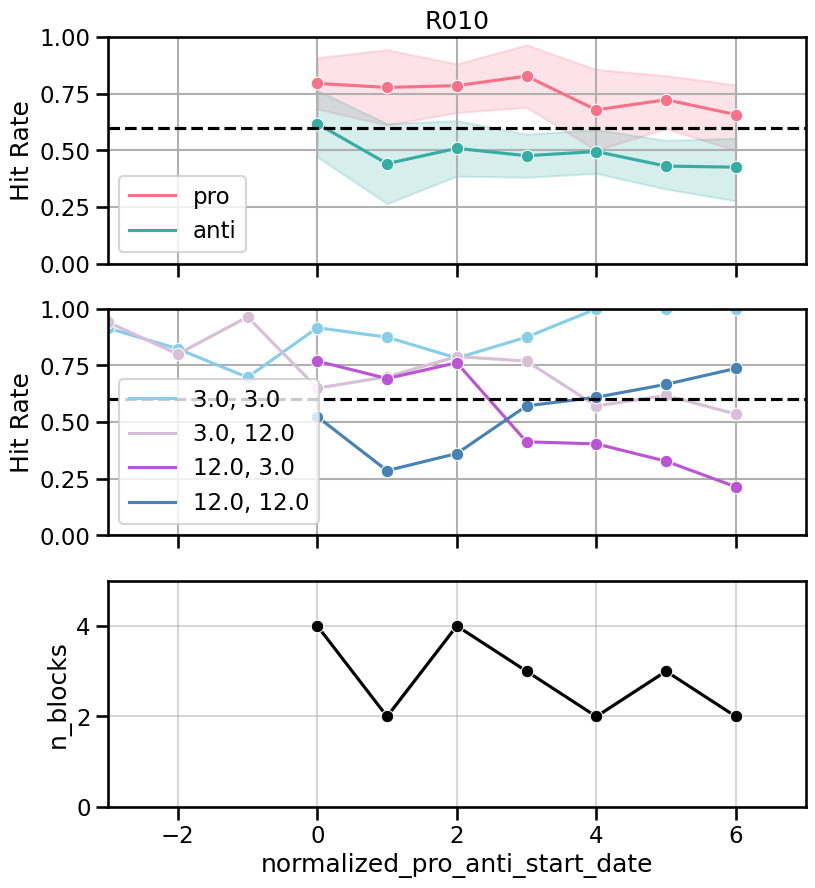

In [41]:
animal = animals[0]
fig, ax = plt.subplots(3, 1, figsize=(9, 10), sharex=True)
plot_stim_performance_by_pro_anti(
    trials_df.query("animal_id == @animal"),
    ax=ax[0],
    x_var="normalized_pro_anti_start_date",
    title=animal,
    aesthetics=False,
)
plot_stim_performance(
    trials_df.query("animal_id == @animal"),
    ax=ax[1],
    x_var="normalized_pro_anti_start_date",
    aesthetics=False,
)
ax[1].set_xlim(-3, None)

plot_n_pro_anti_blocks_days(
    trials_df.query("animal_id == @animal"),
    ax=ax[2],
    x_var="normalized_pro_anti_start_date",
    title=animal,
    aesthetics=False,
)

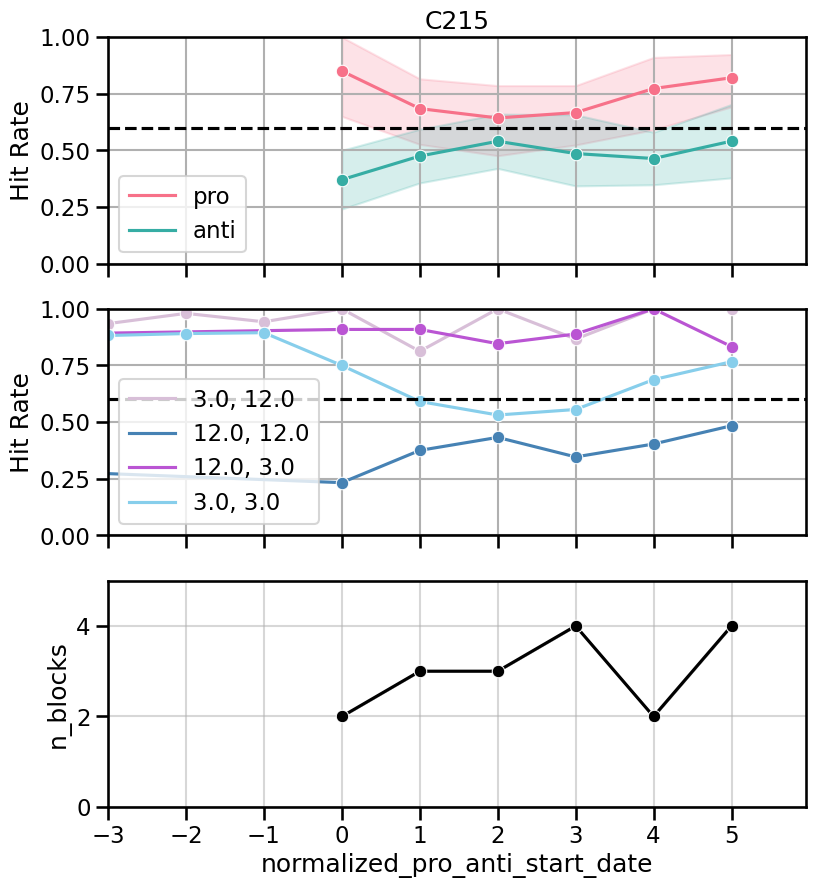

In [42]:
animal = animals[1]
fig, ax = plt.subplots(3, 1, figsize=(9, 10), sharex=True)
plot_stim_performance_by_pro_anti(
    trials_df.query("animal_id == @animal"),
    ax=ax[0],
    x_var="normalized_pro_anti_start_date",
    title=animal,
    aesthetics=False,
)
plot_stim_performance(
    trials_df.query("animal_id == @animal"),
    ax=ax[1],
    x_var="normalized_pro_anti_start_date",
    aesthetics=False,
)
ax[1].set_xlim(-3, None)

plot_n_pro_anti_blocks_days(
    trials_df.query("animal_id == @animal"),
    ax=ax[2],
    x_var="normalized_pro_anti_start_date",
    title=animal,
    aesthetics=False,
)

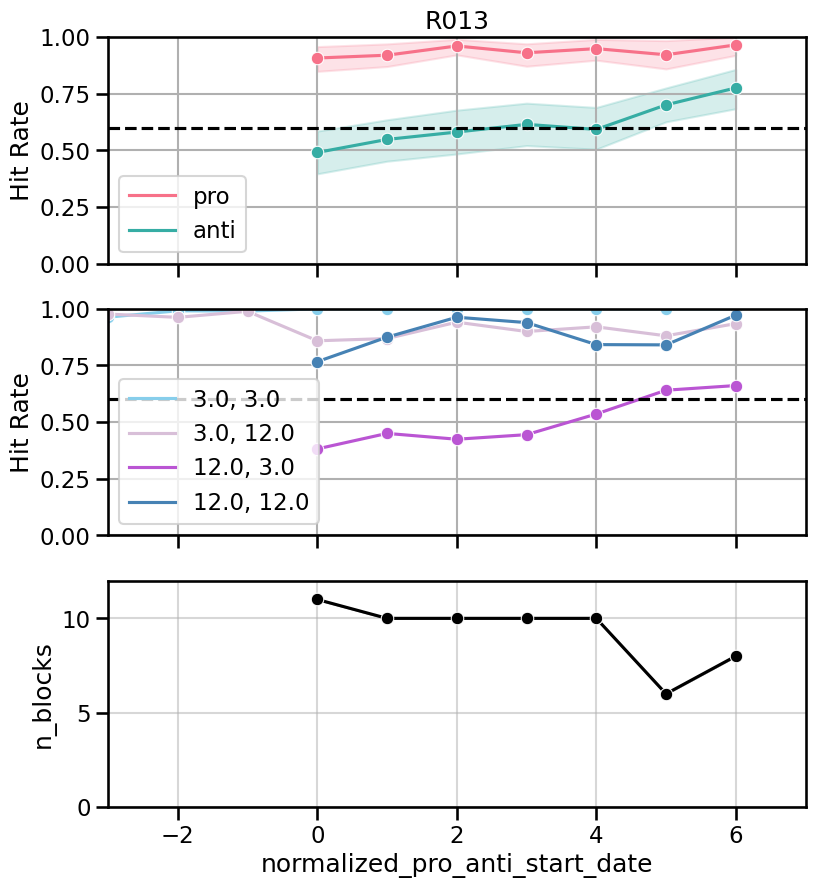

In [43]:
animal = animals[2]
fig, ax = plt.subplots(3, 1, figsize=(9, 10), sharex=True)
plot_stim_performance_by_pro_anti(
    trials_df.query("animal_id == @animal"),
    ax=ax[0],
    x_var="normalized_pro_anti_start_date",
    title=animal,
    aesthetics=False,
)
plot_stim_performance(
    trials_df.query("animal_id == @animal"),
    ax=ax[1],
    x_var="normalized_pro_anti_start_date",
    aesthetics=False,
)
ax[1].set_xlim(-3, None)

plot_n_pro_anti_blocks_days(
    trials_df.query("animal_id == @animal"),
    ax=ax[2],
    x_var="normalized_pro_anti_start_date",
    title=animal,
    aesthetics=False,
)